<a href="https://colab.research.google.com/github/yyoshiaki/2019SpringCamp_GP/blob/master/Gaussian_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ガウス過程回帰

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from numpy.random import multivariate_normal as mvnrand

様々なカーネル

In [0]:
def let (val, func):
    return func(val)

#comment  
  
def klinear ():
    b = randn()
    return lambda x,y: b + x * y

def kexp (sigma):
    return lambda x,y: exp (- abs(x - y) / sigma)

def kgauss (params):
    [tau,sigma] = params
    return lambda x,y: exp(tau) * exp (-(x - y)**2 / exp(sigma))

def kperiodic (params):
    [tau,sigma] = params
    return lambda x,y: exp (tau * cos ((x - y) / sigma))

def kmatern3 (sigma):
    return lambda x,y: \
        let (abs(x - y), lambda r:
             (1 + sqrt(3) * r / sigma) * exp (- sqrt(3) * r / sigma))

def kmatern5 (sigma):
    return lambda x,y: \
        let (abs(x - y), lambda r:
             (1 + sqrt(5) * r / sigma + 5 * r * r / (3 * sigma * sigma))
             * exp (- sqrt(5) * r / sigma))

def kernel_matrix (xx, kernel):
    N = len(xx)
    eta = 1e-6
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def fgp (xx, kernel):
    N = len(xx)
    K = kernel_matrix (xx, kernel)
    return mvnrand (np.zeros(N), K)

def plot_gaussian ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kgauss((1,1))))

def plot_linear ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, klinear()))

def plot_exponential ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kexp(1)))

def plot_periodic ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kperiodic((1,0.5))))
        
def plot_matern3 ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kmatern3(1)))
        
def plot_matern5 ():
    xx = np.linspace (xmin, xmax, N)
    for m in range(M):
        plot (xx, fgp (xx, kmatern5(1)))

In [0]:
xmin,xmax = -5,5
N=100
M=5

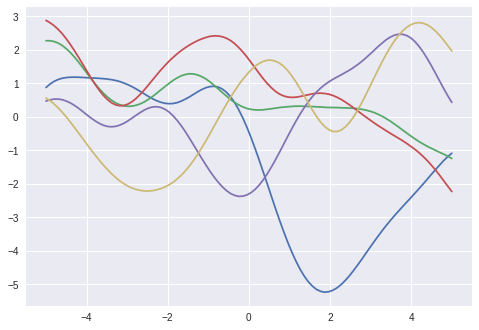

In [0]:
plot_gaussian ()

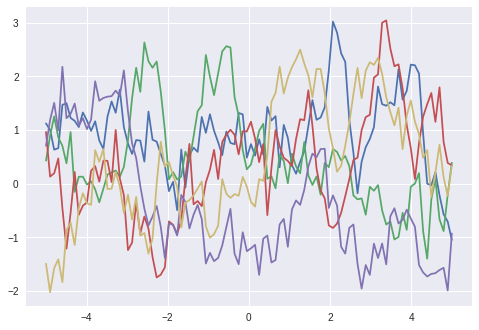

In [0]:
plot_exponential ()

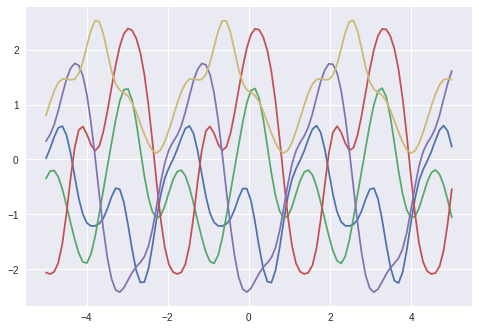

In [0]:
plot_periodic ()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: covariance is not positive-semidefinite.


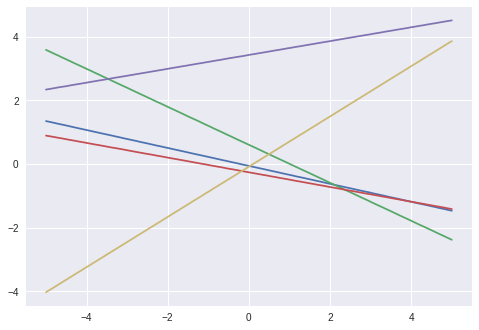

In [0]:
plot_linear ()

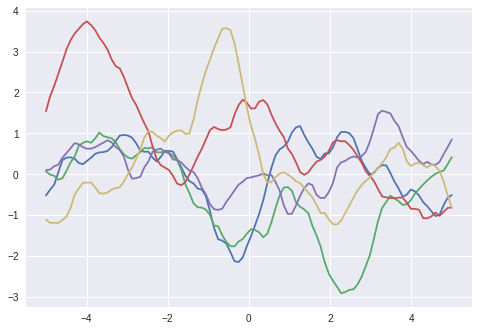

In [0]:
plot_matern3()

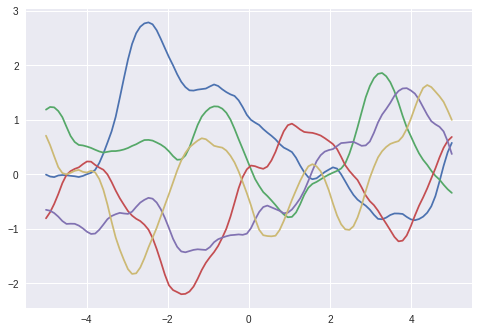

In [0]:
plot_matern5()

ガウス過程回帰モデルの計算

In [0]:
from numpy import exp,sqrt
from numpy.linalg import inv

In [0]:
def kgauss (params):
    [tau,sigma] = params
    return lambda x,y: tau * exp (-(x - y)**2 / (2 * sigma * sigma))

def kv (x, xtrain, kernel):
    return np.array ([kernel(x,xi) for xi in xtrain])

def kernel_matrix (xx, kernel):
    N = len(xx)
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def gpr (xx, xtrain, ytrain, kernel):
    K = kernel_matrix (xtrain, kernel)
    Kinv = inv(K)
    ypr = []; spr = []
    for x in xx:
        s = kernel (x,x) + eta
        k = kv (x, xtrain, kernel)
        ypr.append (k.T.dot(Kinv).dot(ytrain))
        spr.append (s - k.T.dot(Kinv).dot(k))
    return ypr, spr

def gpplot (xx, xtrain, ytrain, kernel, params):
    ypr,spr = gpr (xx, xtrain, ytrain, kernel(params))
    plot (xtrain, ytrain, 'bx', markersize=16)
    plot (xx, ypr, 'b-')
    fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')


In [0]:
# plot parameters
N    = 100
xmin = -1
xmax = 3.5
ymin = -1
ymax = 3

# GP kernel parameters
eta   = 0.1
tau   = 1
sigma = 1

In [0]:
train = np.loadtxt ('gpr.dat',dtype=float)

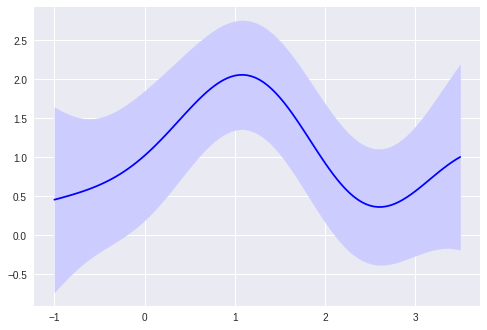

In [0]:
xtrain = train.T[0]
ytrain = train.T[1]
kernel = kgauss
params = [tau,sigma]
xx = np.linspace (xmin, xmax, N)
gpplot (xx, xtrain, ytrain, kernel, params)

パラメータを変えてみる

In [0]:
# GP kernel parameters
eta   = 0.1
tau   = 1
sigma = 0.5

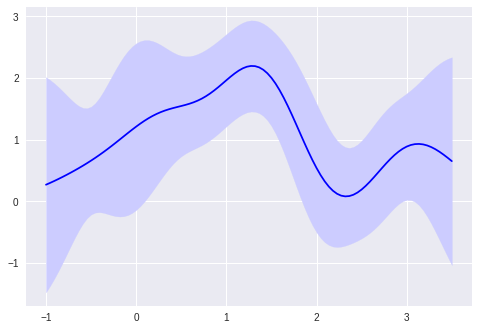

In [0]:
xtrain = train.T[0]
ytrain = train.T[1]
kernel = kgauss
params = [tau,sigma]
xx = np.linspace (xmin, xmax, N)
gpplot (xx, xtrain, ytrain, kernel, params)